<a href="https://colab.research.google.com/github/Jayjake1/MachineLearningProjects/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
pip install geopandas

In [4]:
import geopandas as gpd

In [5]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = "/content/drive/MyDrive/Almabetter/NYC Taxi Prediction/Copy of NYC Taxi Data.csv"
taxi_data=pd.read_csv(file_path,index_col=False)

In [7]:
taxi_data.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435

[5 rows x 11 columns]

In [8]:
taxi_data.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435

[5 rows x 11 columns]

In [9]:
taxi_data.describe()

vendor_id  passenger_count  ...  dropoff_latitude  trip_duration
count  1.458644e+06     1.458644e+06  ...      1.458644e+06   1.458644e+06
mean   1.534950e+00     1.664530e+00  ...      4.075180e+01   9.594923e+02
std    4.987772e-01     1.314242e+00  ...      3.589056e-02   5.237432e+03
min    1.000000e+00     0.000000e+00  ...      3.218114e+01   1.000000e+00
25%    1.000000e+00     1.000000e+00  ...      4.073588e+01   3.970000e+02
50%    2.000000e+00     1.000000e+00  ...      4.075452e+01   6.620000e+02
75%    2.000000e+00     2.000000e+00  ...      4.076981e+01   1.075000e+03
max    2.000000e+00     9.000000e+00  ...      4.392103e+01   3.526282e+06

[8 rows x 7 columns]

In [10]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [11]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
drop_off=taxi_data['dropoff_datetime']
drop_off.head()

0    2016-03-14 17:32:30
1    2016-06-12 00:54:38
2    2016-01-19 12:10:48
3    2016-04-06 19:39:40
4    2016-03-26 13:38:10
Name: dropoff_datetime, dtype: object

In [13]:
taxi_data.pickup_datetime = taxi_data.pickup_datetime.apply(pd.to_datetime) # converting object into datetime format

In [14]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [15]:
taxi_data['pickup_datetime'].head()

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

In [16]:
taxi_data[['dropoff_datetime']].head()
# df.assign(Date=df.Date.dt.date, Time=df.Date.dt.time)

dropoff_datetime
0  2016-03-14 17:32:30
1  2016-06-12 00:54:38
2  2016-01-19 12:10:48
3  2016-04-06 19:39:40
4  2016-03-26 13:38:10

In [17]:
dropoff_df=taxi_data[['dropoff_datetime']]
type(dropoff_df)

pandas.core.frame.DataFrame

In [18]:
dropoff_df.dropoff_datetime = dropoff_df.dropoff_datetime.apply(pd.to_datetime)
dropoff_df.assign(Dropoff_Date=dropoff_df.dropoff_datetime.dt.date, dropoff_Time=dropoff_df.dropoff_datetime.dt.time)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dropoff_datetime Dropoff_Date dropoff_Time
0       2016-03-14 17:32:30   2016-03-14     17:32:30
1       2016-06-12 00:54:38   2016-06-12     00:54:38
2       2016-01-19 12:10:48   2016-01-19     12:10:48
3       2016-04-06 19:39:40   2016-04-06     19:39:40
4       2016-03-26 13:38:10   2016-03-26     13:38:10
...                     ...          ...          ...
1458639 2016-04-08 13:44:02   2016-04-08     13:44:02
1458640 2016-01-10 07:46:10   2016-01-10     07:46:10
1458641 2016-04-22 07:10:25   2016-04-22     07:10:25
1458642 2016-01-05 16:02:39   2016-01-05     16:02:39
1458643 2016-04-05 14:47:43   2016-04-05     14:47:43

[1458644 rows x 3 columns]

In [19]:
taxi_data.pickup_datetime = taxi_data.pickup_datetime.apply(pd.to_datetime)
taxi_data=taxi_data.assign(pickup_date=taxi_data.pickup_datetime.dt.date, pickup_Time=taxi_data.pickup_datetime.dt.time)

In [20]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_Time'],
      dtype='object')

In [21]:
new=taxi_data.loc[:,['pickup_datetime', 'dropoff_datetime']]
# taxi_data[['dropoff_datetime','pickup_datetime']]  # works same as above
new.reset_index()

index     pickup_datetime     dropoff_datetime
0              0 2016-03-14 17:24:55  2016-03-14 17:32:30
1              1 2016-06-12 00:43:35  2016-06-12 00:54:38
2              2 2016-01-19 11:35:24  2016-01-19 12:10:48
3              3 2016-04-06 19:32:31  2016-04-06 19:39:40
4              4 2016-03-26 13:30:55  2016-03-26 13:38:10
...          ...                 ...                  ...
1458639  1458639 2016-04-08 13:31:04  2016-04-08 13:44:02
1458640  1458640 2016-01-10 07:35:15  2016-01-10 07:46:10
1458641  1458641 2016-04-22 06:57:41  2016-04-22 07:10:25
1458642  1458642 2016-01-05 15:56:26  2016-01-05 16:02:39
1458643  1458643 2016-04-05 14:44:25  2016-04-05 14:47:43

[1458644 rows x 3 columns]

In [22]:
sub_data = taxi_data.loc[:,['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

In [23]:
sub_data1 = taxi_data.copy()
sub_data1=sub_data1.drop(sub_data1[sub_data1['passenger_count']==0].index)

In [24]:
sub_data1.shape

(1458584, 13)

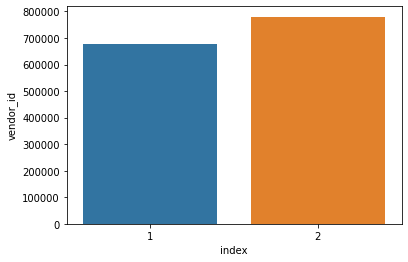

In [25]:
import seaborn as sns
vend=sub_data1.vendor_id.value_counts().reset_index()
sns.barplot(x = vend['index'], y = vend.vendor_id,data = vend)

In [26]:
passengers = sub_data1.passenger_count.value_counts().reset_index()
passengers

index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      7                3
7      9                1
8      8                1

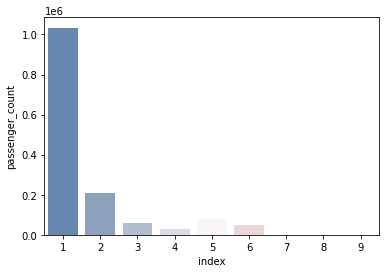

In [27]:
sns.barplot(x=passengers['index'],y = passengers['passenger_count'],palette='vlag')

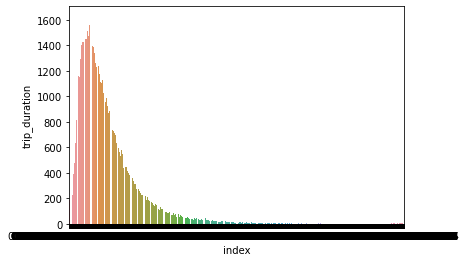

In [28]:
time_minutes=(sub_data1['trip_duration']/60).value_counts().reset_index() # converting to minutes
sns.barplot(data=time_minutes,x=time_minutes['index'],y=time_minutes['trip_duration'])

In [29]:
from sklearn.metrics.pairwise import haversine_distances

In [30]:
sub_data.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -73.982155        40.767937         -73.964630         40.765602
1        -73.980415        40.738564         -73.999481         40.731152
2        -73.979027        40.763939         -74.005333         40.710087
3        -74.010040        40.719971         -74.012268         40.706718
4        -73.973053        40.793209         -73.972923         40.782520

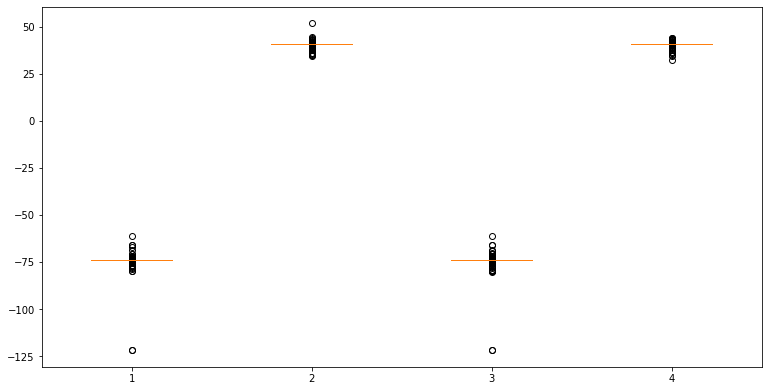

In [31]:
dat = [sub_data.pickup_longitude,sub_data.pickup_latitude,sub_data.dropoff_longitude,sub_data.dropoff_latitude]
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(dat)
plt.show()

In [32]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_Time           0
dtype: int64

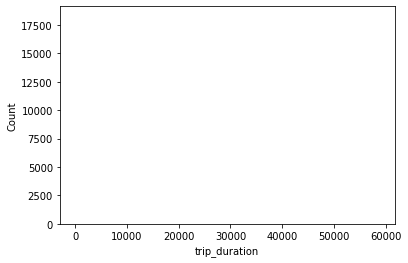

In [33]:
trip_to_min = taxi_data['trip_duration']/60
import seaborn as sns
sns.histplot(trip_to_min)

In [34]:
taxi_data['trip_duration']/60

0           7.583333
1          11.050000
2          35.400000
3           7.150000
4           7.250000
             ...    
1458639    12.966667
1458640    10.916667
1458641    12.733333
1458642     6.216667
1458643     3.300000
Name: trip_duration, Length: 1458644, dtype: float64

In [35]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [36]:
# Create a map
m_1 = folium.Map(location=[40.730610,-73.935242], tiles='openstreetmap', zoom_start=13)

for idx, row in sub_data[:1000].iterrows():
    Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(m_1)
# Display the map
m_1

In [37]:
m_2 = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=13)
mc = MarkerCluster()
# Add points to the map

for idx, row in sub_data[:10000].iterrows():
     mc.add_child(Marker([row['dropoff_latitude'], row['dropoff_longitude']])).add_to(m_2)
# Display the map
m_2

In [38]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_Time'],
      dtype='object')

In [39]:
sub_data1 = taxi_data.copy()

In [40]:
import datetime
sub_data1['pickup_year'] = sub_data1['pickup_datetime'].dt.year
sub_data1['pickup_month'] = sub_data1['pickup_datetime'].dt.month
sub_data1['pickup_day'] = sub_data1['pickup_datetime'].dt.day
sub_data1['pickup_hour'] = sub_data1['pickup_datetime'].dt.hour
sub_data1['pickup_minute'] = sub_data1['pickup_datetime'].dt.minute
sub_data1['pickup_second'] = sub_data1['pickup_datetime'].dt.second


In [41]:
sub_data1.head()

id  vendor_id  ... pickup_minute pickup_second
0  id2875421          2  ...            24            55
1  id2377394          1  ...            43            35
2  id3858529          2  ...            35            24
3  id3504673          2  ...            32            31
4  id2181028          2  ...            30            55

[5 rows x 19 columns]

In [42]:
# plt.figure(figsize=(12,8))
# sns.histplot(sub_data1.trip_duration,color='green')


In [43]:
month_dt=sub_data1.pickup_month.value_counts()

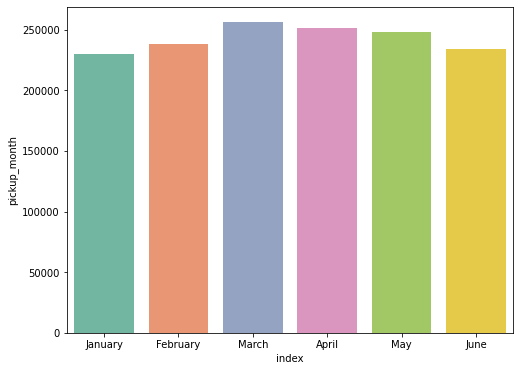

In [44]:
new_dt=month_dt.sort_index().reset_index()
plt.figure(figsize=(8,6))
new_dt=new_dt.replace([1,2,3,4,5,6],['January','February','March','April','May','June'])
sns.barplot(x=new_dt['index'],y=new_dt['pickup_month'],data=new_dt,palette='Set2')

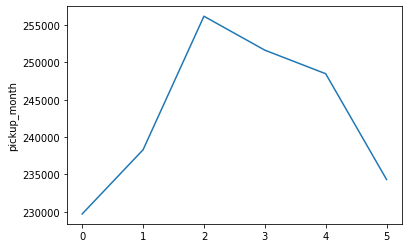

In [45]:
sns.lineplot(x=new_dt.index,y=new_dt.pickup_month)

In [46]:

new_dt

index  pickup_month
0   January        229707
1  February        238300
2     March        256189
3     April        251645
4       May        248487
5      June        234316

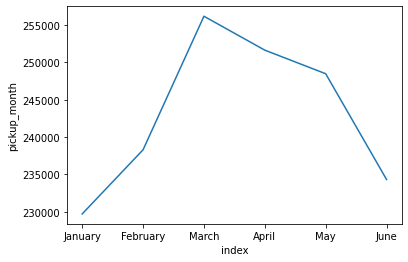

In [47]:
sns.lineplot(x=new_dt['index'],y=new_dt.pickup_month)

In [48]:
sub_data1.drop(sub_data1[sub_data1['passenger_count']==0].index)

id  vendor_id  ... pickup_minute pickup_second
0        id2875421          2  ...            24            55
1        id2377394          1  ...            43            35
2        id3858529          2  ...            35            24
3        id3504673          2  ...            32            31
4        id2181028          2  ...            30            55
...            ...        ...  ...           ...           ...
1458639  id2376096          2  ...            31             4
1458640  id1049543          1  ...            35            15
1458641  id2304944          2  ...            57            41
1458642  id2714485          1  ...            56            26
1458643  id1209952          1  ...            44            25

[1458584 rows x 19 columns]

In [49]:
sub_data1.shape

(1458644, 19)

In [50]:
1458644 - 1458584

60

In [51]:
sub_data1.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64